In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing

#讀入資料
df_Train = pd.read_csv('HWData/Titanic_Train.csv')
df_Train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


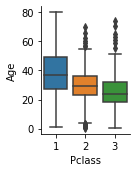

In [3]:
#Q1-1:Pclass和Age的關係
g = sns.catplot("Pclass",'Age',
                data=df_Train,
                kind="box", height=2.5, aspect=.8)
#視覺化圖形上看似有關聯

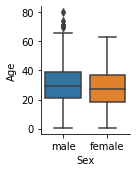

In [4]:
#Q1-2:Sex和Age的關係
g = sns.catplot('Sex','Age',
                data=df_Train,
                kind="box", height=2.5, aspect=.8)
#視覺化圖形上看似無關聯

In [11]:
#Q2- 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值

#1-#透過 preprocessing 轉換 Sex,讓 Male=1, FeMale-0
le = preprocessing.LabelEncoder()
df_Train['Sex']=le.fit_transform(df_Train['Sex'])
display(df_Train)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [12]:
df_Selected = df_Train['PassengerId','Pclass','Sex','Age']
df_Selected

,PassengerId,Pclass,Sex,Age
0,1,3,1,22.0
1,2,1,0,38.0
2,3,3,0,26.0
3,4,1,0,35.0
4,5,3,1,35.0
...,...,...,...,...
886,887,2,1,27.0
887,888,1,0,19.0
888,889,3,0,NaN
889,890,1,1,26.0


In [13]:
#2-計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(df_Selected)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.186414,4.582576,13.527749,13.601471,5.773503,32.619013,21.189620,9.486833,12.124356,...,881.068669,882.000567,883.020951,884.005090,885.163827,886.014673,887.007892,1025.374728,889.011249,890.056178
1,16.186414,0.000000,12.206556,3.605551,4.795832,5.291503,16.792856,36.565011,13.190906,25.317978,...,880.017045,881.147547,882.057821,883.098522,884.002828,885.069489,886.203701,1024.221981,888.081640,889.023059
2,4.582576,12.206556,0.000000,9.273618,9.273618,3.651484,28.372522,24.535688,6.082763,13.928388,...,879.028441,880.009091,881.003405,882.001134,883.095691,884.001697,885.029943,1023.064677,887.002818,888.020833
3,13.527749,3.605551,9.273618,0.000000,2.449490,3.464102,19.261360,33.316662,9.643651,21.863211,...,878.005125,879.098402,880.028977,881.059589,882.011338,883.037372,884.144785,1021.912586,886.046274,887.007892
4,13.601471,4.795832,9.273618,2.449490,0.000000,1.154701,19.209373,33.136083,9.000000,21.633308,...,877.002280,878.096806,879.028441,880.056816,881.009648,882.036847,883.147779,1020.755929,885.048021,886.005079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.014673,885.069489,884.001697,883.037372,882.036847,1017.291830,880.414675,879.356014,878.001139,877.096916,...,7.874008,6.557439,3.162278,3.000000,12.124356,0.000000,8.185353,2.828427,3.316625,6.480741
887,887.007892,886.203701,885.029943,884.144785,883.147779,1018.449148,881.695526,880.167030,879.038679,878.014806,...,15.394804,6.164414,9.949874,7.071068,20.199010,8.185353,0.000000,2.581989,7.348469,13.527749
888,1025.374728,1024.221981,1023.064677,1021.912586,1020.755929,1019.601229,1018.449148,1017.291830,1016.136474,1014.982430,...,8.164966,6.928203,6.000000,4.760952,3.464102,2.828427,2.581989,0.000000,2.828427,2.581989
889,889.011249,888.081640,887.002818,886.046274,885.048021,1020.757888,883.443830,882.328737,881.003405,880.082951,...,10.816654,8.366600,6.403124,5.477226,13.784049,3.316625,7.348469,2.828427,0.000000,6.403124


In [24]:
#3.1- KNN補值, k=1, weights= uniform 

# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled1 = pd.DataFrame(imputer.fit_transform(df_Selected))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled1.rename(columns={0:'PassengerId',1:'Pclass',2:'Sex', 3:'Age', 4:'Imputed remark'},inplace=True)
display(df_filled1)

,PassengerId,Pclass,Sex,Age,Imputed remark
0,1.0,3.0,1.0,22.0,0.0
1,2.0,1.0,0.0,38.0,0.0
2,3.0,3.0,0.0,26.0,0.0
3,4.0,1.0,0.0,35.0,0.0
4,5.0,3.0,1.0,35.0,0.0
...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0
887,888.0,1.0,0.0,19.0,0.0
888,889.0,3.0,0.0,19.0,1.0
889,890.0,1.0,1.0,26.0,0.0


In [25]:
#3.2- KNN補值, k=3, weights= uniform 
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled2 = pd.DataFrame(imputer.fit_transform(df_Selected))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled2.rename(columns={0:'PassengerId',1:'Pclass',2:'Sex', 3:'Age', 4:'Imputed remark'},inplace=True)
display(df_filled2)

,PassengerId,Pclass,Sex,Age,Imputed remark
0,1.0,3.0,1.0,22.0,0.0
1,2.0,1.0,0.0,38.0,0.0
2,3.0,3.0,0.0,26.0,0.0
3,4.0,1.0,0.0,35.0,0.0
4,5.0,3.0,1.0,35.0,0.0
...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0
887,888.0,1.0,0.0,19.0,0.0
888,889.0,3.0,0.0,26.0,1.0
889,890.0,1.0,1.0,26.0,0.0


In [26]:
#3.3- KNN補值,K=3,weights= distance
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled3 = pd.DataFrame(imputer.fit_transform(df_Selected))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled3.rename(columns={0:'PassengerId',1:'Pclass',2:'Sex', 3:'Age', 4:'Imputed remark'},inplace=True)
display(df_filled3)

,PassengerId,Pclass,Sex,Age,Imputed remark
0,1.0,3.0,1.0,22.0,0.0
1,2.0,1.0,0.0,38.0,0.0
2,3.0,3.0,0.0,26.0,0.0
3,4.0,1.0,0.0,35.0,0.0
4,5.0,3.0,1.0,35.0,0.0
...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0
887,888.0,1.0,0.0,19.0,0.0
888,889.0,3.0,0.0,26.0,1.0
889,890.0,1.0,1.0,26.0,0.0
